# The hiccups

As a researcher I am interested in detecting hiccup, but need more date so I want to generate some time series.
The scenario I want to model is
* Hiccups should be observed for a week, except during sleeping (23:00 - 8:00).
* A hiccup happens once an hour at a random time
* Time series should have a time point every minute

Other scenarios that would nice
1. Multiple hiccups occur in a bout (see https://en.wikipedia.org/wiki/Hiccup for histogram)
1. Person has infrequent multiple hiccups once a day
1. Person has higher chance of hiccup after eating (from 8:00 - 9:00, 12:00 - 13:00 and 18:00 - 19:00)

In [1]:
from math import floor
import matplotlib.pyplot as plt
import numpy as np
from sequgen.deterministic.triangular_peak import triangular_peak
from sequgen.dimension import Dimension
from sequgen.parameter_space import ParameterSpace


In [2]:
timepoints = (np.concatenate((
    np.arange('2020-03-01T08:00', '2020-03-01T23:00', dtype='datetime64[m]'),
    np.arange('2020-03-02T08:00', '2020-03-02T23:00', dtype='datetime64[m]'),
    np.arange('2020-03-03T08:00', '2020-03-03T23:00', dtype='datetime64[m]'),
    np.arange('2020-03-04T08:00', '2020-03-04T23:00', dtype='datetime64[m]'),
    np.arange('2020-03-05T08:00', '2020-03-05T23:00', dtype='datetime64[m]'),
))  - np.datetime64('2020-03-01T08:00')).astype(int)  # Convert datatimes into minutes since 2020-03-01T08:00

In [3]:
space = ParameterSpace((
    Dimension('placement', 0, 59),  # minute in an hour
    Dimension('height', 5, 10),  # severity
))

hiccups = np.zeros(len(timepoints), dtype=float)
for day in range(5):
    daily_offset = day * (24 * 60)
    for hour in range(15):
        parameters = space.sample()
        # add offset, watchout placement should pick a value from timepoints, not an index
        parameters['placement'] = floor(parameters['placement']) + daily_offset + hour * 60
        hiccup = triangular_peak(timepoints, width_base_left=0, width_base_right=2, **parameters) # TODO unable to make peak of 1 time point
        hiccups += hiccup
        

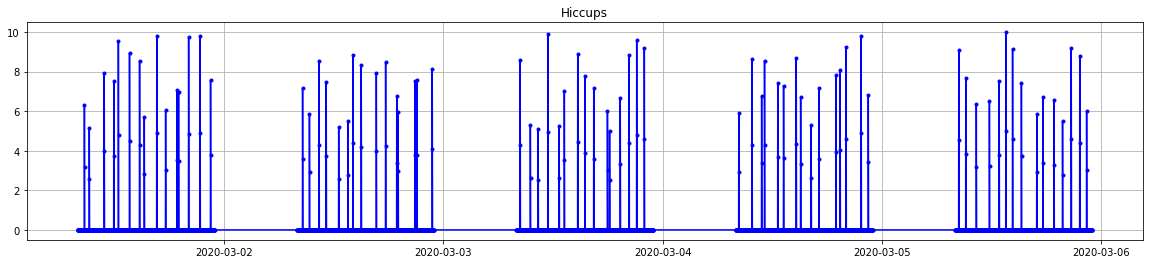

In [6]:
def plot(title, x, y):
    plt.figure(figsize=(20, 4))
    plt.plot(x, y, ".b-")
    plt.title(title)
    plt.grid(True)
    plt.show()
    
plot('Hiccups', timepoints.astype('timedelta64[m]') + np.datetime64('2020-03-01T08:00'), hiccups)